In [29]:
%matplotlib inline
import numpy as np
import sys, scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

sys.path.append('./src')
import laplacian, gradient, plotGraph, librosaF
import RecurrenceMatrix as RM

In [23]:
cqt_med = np.load("./tempArray/cqt_med.npy")
sigmas = np.load("./sigmas/UpdateTest_num_singleII_Alpha100000/UpdateTest_num_singleII_Alpha100000_step5.npy")
m_true = np.load("./tempArray/m_true.npy")

gm = RM.feature2GaussianMatrix(cqt_med, sigmas) #(nSample, nFeature)


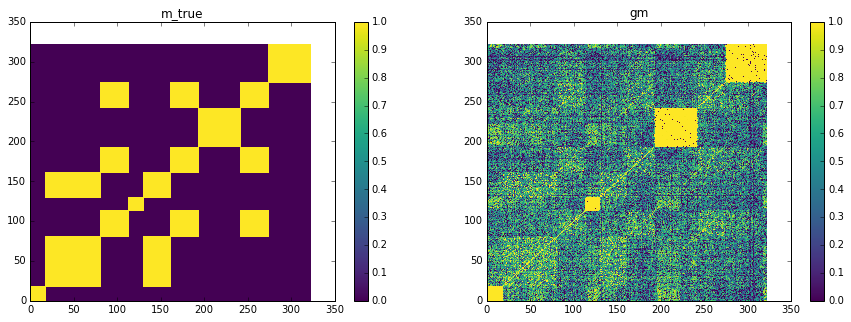

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pcolor(m_true, cmap="viridis")
plt.colorbar()
plt.title("m_true")

plt.subplot(1, 2, 2)
plt.pcolor(gm, cmap="viridis")
plt.colorbar()
plt.title("gm")

plt.show()

In [25]:
Y_true = laplacian.getNormLaplacian(m_true, 10)
Y = laplacian.getNormLaplacian(gm, 10)

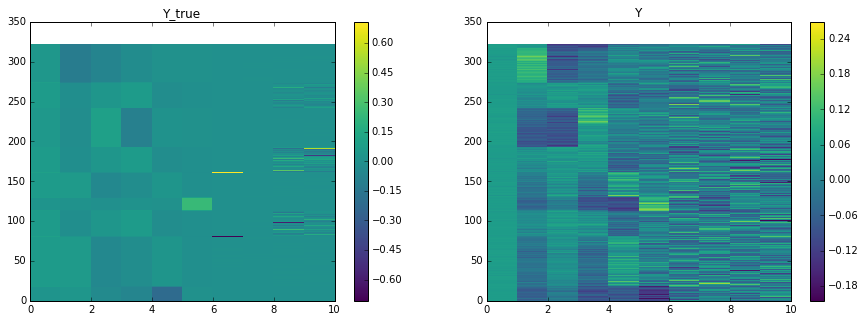

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pcolor(Y_true, cmap="viridis")
plt.colorbar()
plt.title("Y_true")

plt.subplot(1, 2, 2)
plt.pcolor(Y, cmap="viridis")
plt.colorbar()
plt.title("Y")

plt.show()

In [34]:
def boundaryDetection(Y, nCluster):
    row_leng = np.linalg.norm(Y, axis=1) #get length of each row
    row_leng[row_leng==0] = 1 #replace the legth of 0 to 1
    Y_norm = Y / row_leng[:, np.newaxis]

    clf = KMeans(n_clusters=nCluster, max_iter=1000).fit(Y_norm)
    centroids, labels = clf.cluster_centers_, clf.labels_

    boundary = []
    for idx in xrange(len(labels)-1):
        if labels[idx] != labels[idx+1]:
            boundary += [idx]
    
    return boundary, centroids

nCluster = 2
b_true, c_true = boundaryDetection(Y_true, nCluster)
b, c = boundaryDetection(Y_true, nCluster)

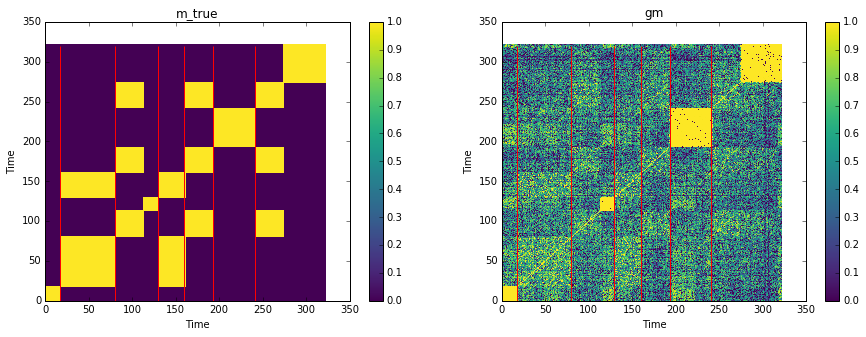

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pcolor(m_true, cmap="viridis")
plt.colorbar()
plt.vlines(b_true, 0, 320, color='r')
plt.title('m_true')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.pcolor(gm, cmap="viridis")
plt.colorbar()
plt.vlines(b, 0, 320, color='r')
plt.title('gm')
plt.xlabel('Time')
plt.ylabel('Time')

plt.show()